In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
x = np.random.uniform(low=0,high=0.5,size=(64,1))

In [4]:
x = np.transpose(x)

In [5]:
#defining haar_matrix

In [6]:
k=64

In [7]:
def dft(n):
    dft_mat = []
    for i in range(n):
        for j in range(n):
            k = i*j
            k1 = np.exp(-((2*1j*np.pi*k)/n))
            dft_mat = np.append(dft_mat,k1)
    dft_mat = np.reshape(dft_mat,(n,n))      
    return dft_mat   

In [8]:
def dct(N):
    dct_mat=[]
    for n in range(N):
        for k in range(N):
            ans = np.cos((np.pi*k*(2*n+1))/(2*N))
            dct_mat = np.append(dct_mat, ans)
            
    dct_mat = np.reshape(dct_mat,(N,N))   
 
    return dct_mat


In [9]:
def haar(N):
    final=[]
    if N==2:
        return(np.matrix(([1,1],[1,-1])))
    v = np.log2(N)-1
    hn2 = haar(N/2)
    result1 = np.concatenate((hn2,hn2),axis=1)
    matrix1 = (pow(2,v/2))*np.identity(int(N/2))
    result2 = np.concatenate((matrix1,-matrix1),axis=1)
    final = np.concatenate((result1,result2),axis=0)
    return(final)

In [10]:
def update_dft(l,ydft,k):
#    print(l)

    a = (int((k+1-l)/2))
    b = (int((k+1+l)/2))
    for k in range(a,b, 1):
    
        ydft[0][k] = 0
    return ydft   

In [11]:
def error(x,y,k):
    diff=0
    for i in range(k):
        diff += np.square(abs(x[0][i]- y[0][i]))
        
#    print(diff)    
    return(diff/k)


def update_dct_haar(l,mat):
    for i in range(l):
        mat[0][l]=0
    return(mat)  

In [12]:
#calculating dft
ydft = np.matmul(x,dft(k))   
# calculating dct
ydct = np.matmul(x,dct(k))
#calculating haar
haar1 = np.transpose(haar(k))
yhaar = np.matmul(x,haar1)
yhaar = np.array(yhaar)

In [13]:
#main code for DFT
f_err=[] 
for L in range(k):
    ydft_updated = update_dft(L,ydft,k)
    xinv = np.linalg.inv(dft(k))
#    
    dft_out = np.matmul(ydft_updated,xinv)
    f_err = np.append(f_err,error(x,dft_out,k))

In [14]:
inputx = np.arange(0,k,1) 

#plt.plot(inputx,final_error)   

In [15]:
##main code for DCT
f_err_dct=[] 
for L in range(k):
    ydct_updated = update_dct_haar(L,ydct)
    yinv = np.linalg.inv(dct(k))
    dct_out = np.matmul(ydct_updated,yinv)
    f_err_dct= np.append(f_err_dct,error(x,dct_out,k))


In [16]:
f_err_haar=[] 
for L in range(k):
    yhaar_updated = update_dct_haar(L,yhaar)
    zinv = np.linalg.inv(np.transpose(haar(k)))
    haar_out = np.matmul(yhaar_updated,zinv)
    haar_out = np.array(haar_out)
    f_err_haar= np.append(f_err_haar,error(x,haar_out,k))
    print(L)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


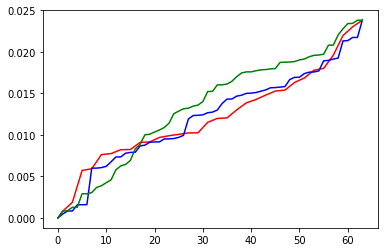

In [17]:
plt.plot(inputx,f_err, 'r', label='DFT') 
plt.plot(inputx,f_err_dct,'b', label = 'DCT') 
plt.plot(inputx,f_err_haar, 'g', label='HAAR')